In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
#we are using 70% of data for training and 30% for testing 

In [3]:
#x is a image and y is its label
(x_train,y_train),(x_test,y_test) = mnist.load_data()

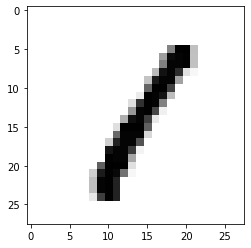

In [4]:
plt.imshow(x_train[3],cmap=plt.cm.binary)
plt.show()

In [5]:
x_train[0]
#first index 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
#in data there are huge numbers present like 171,81,212 so we need to normalise
#it like 0.171, 0.81 , 0.212, but data will not change we are making it in between 1 and 0
#1 and 0 have less difference so..

In [7]:
#axis=1 means changing for columns 
x_train= tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#data is ready to go in cnn model 

In [10]:
model = tf.keras.models.Sequential() #what kind of model? -> Sequential  (a feed forward layer)
model.add(tf.keras.layers.Flatten()) #takes aur 28x28(size of image) and makes it 1x784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))# a simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#we are having 10 outputs thats why softmax(multiple output)

In [11]:
model.compile(optimizer='adam', # to optimize output (more productive)
             loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize loss
             metrics=['accuracy'])
#now we are training
model.fit(x_train,y_train,epochs=15) #for 10 times model gonna compile

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2608 - accuracy: 0.9242
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1061 - accuracy: 0.9674
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0754 - accuracy: 0.9766
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0417 - accuracy: 0.9868
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0321 - accuracy: 0.9894
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0259 - accuracy: 0.9915
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [12]:
#lets check the loss and accuracy
val_loss,val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 802us/step - loss: 0.1448 - accuracy: 0.9762


In [13]:
#loss
val_loss

0.14477920532226562

In [14]:
val_acc
#we are 0.96 % accurate

0.9761999845504761

In [15]:
#now save aur model speciying its path
model.save(r'C:\Users\OMEN\Desktop\Number detectation\digit_model.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\OMEN\Desktop\Number detectation\digit_model.model\assets


In [16]:
new_model = tf.keras.models.load_model(r'C:\Users\OMEN\Desktop\Number detectation\digit_model.model')
predictions=new_model.predict(x_test)

In [17]:
predictions

array([[6.0202184e-16, 4.0627021e-14, 3.0720731e-15, ..., 1.0000000e+00,
        2.3024673e-21, 1.3465221e-12],
       [1.9362101e-22, 5.1267680e-08, 1.0000000e+00, ..., 4.3675623e-15,
        2.9075680e-17, 3.6268157e-26],
       [1.9485962e-17, 9.9999976e-01, 2.1389596e-13, ..., 1.9116567e-07,
        2.1231090e-08, 2.8107608e-14],
       ...,
       [3.1646084e-18, 2.8792460e-13, 4.9823301e-19, ..., 1.2566469e-11,
        2.9054541e-14, 9.8194604e-08],
       [2.5935764e-14, 6.7298915e-15, 4.5530790e-16, ..., 1.4517752e-12,
        7.6728129e-06, 5.7544899e-16],
       [3.6598001e-16, 3.3963845e-19, 1.1924068e-19, ..., 5.1103052e-24,
        7.4796323e-16, 1.8337167e-25]], dtype=float32)

In [18]:
import numpy as np

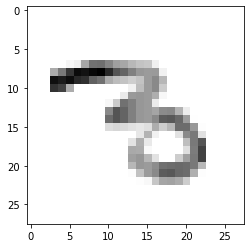

In [53]:
#display predictions
plt.imshow(x_train[30],cmap=plt.cm.binary)
plt.show()

In [54]:
np.argmax(predictions[30])

3